<a href="https://colab.research.google.com/github/hanbiphyun/ESSA_YB/blob/main/ESAA_YB_week3_%EC%BA%90%EA%B8%80_%ED%95%84%EC%82%AC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###“Instacart”라는 데이터셋을 가져와서, 기본적인 탐색적 데이터 분석(Exploratory Data Analysis: EDA)을 수행
- 사용자의 다음 주문은 무슨 상품이 될것인지 예측

In [4]:
import numpy as np #linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
color = sns.color_palette() #인덱스 형태로 색상 불러올수있음

%matplotlib inline
#plt.show() 없어도 바로 그래프 나옴

pd.options.mode.chained_assignment = None # default='warn'


In [5]:
order_products_train_df = pd.read_csv("/order_products__train.csv")
order_products_prior_df = pd.read_csv("/order_products__prior.csv")
orders_df = pd.read_csv("/orders.csv")
products_df = pd.read_csv("/products.csv")
aisles_df = pd.read_csv("/aisles.csv")
departments_df = pd.read_csv("/departments.csv")

In [6]:
orders_df.head()

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,NaN
1,2398795,1,prior,2,3,7,15.0
2,473747,1,prior,3,3,12,21.0
3,2254736,1,prior,4,4,7,29.0
4,431534,1,prior,5,4,15,28.0


In [7]:
order_products_prior_df.head()

,order_id,product_id,add_to_cart_order,reordered
0,2,33120,1.0,1.0
1,2,28985,2.0,1.0
2,2,9327,3.0,0.0
3,2,45918,4.0,1.0
4,2,30035,5.0,0.0


In [8]:
order_products_train_df.head()

,order_id,product_id,add_to_cart_order,reordered
0,1,49302,1,1
1,1,11109,2,1
2,1,10246,3,0
3,1,49683,4,0
4,1,43633,5,1


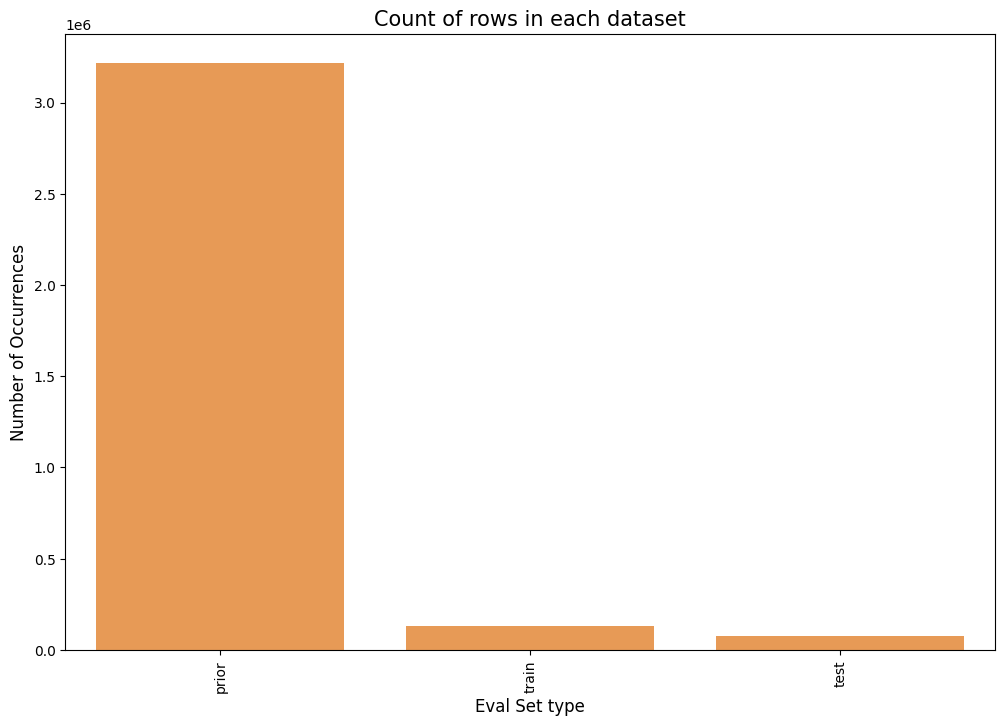

In [9]:
cnt_srs= orders_df.eval_set.value_counts()

plt.figure(figsize=(12,8))
sns.barplot(x=cnt_srs.index, y=cnt_srs.values, alpha=0.8, color=color[1])
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Eval Set type', fontsize=12)
plt.title('Count of rows in each dataset', fontsize=15)
plt.xticks(rotation='vertical')
plt.show()

In [10]:
def get_unique_count(x):
    return len(np.unique(x))

cnt_srs= orders_df.groupby('user_id').aggregate(get_unique_count)
cnt_srs

,order_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
user_id,,,,,,
1,11,2,11,4,7,10
2,15,2,15,5,5,10
3,13,2,13,5,6,9
4,6,2,6,4,4,6
5,5,2,5,3,4,5
...,...,...,...,...,...,...
206205,4,2,4,4,3,3
206206,68,2,68,7,10,15
206207,17,2,17,7,11,11


/tmp/ipython-input-3408822403.py:2: FutureWarning: The provided callable <function max at 0x7ba58990bf60> is currently using SeriesGroupBy.max. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "max" instead.
  cnt_srs=orders_df.groupby('user_id')['order_number'].aggregate(np.max).reset_index()


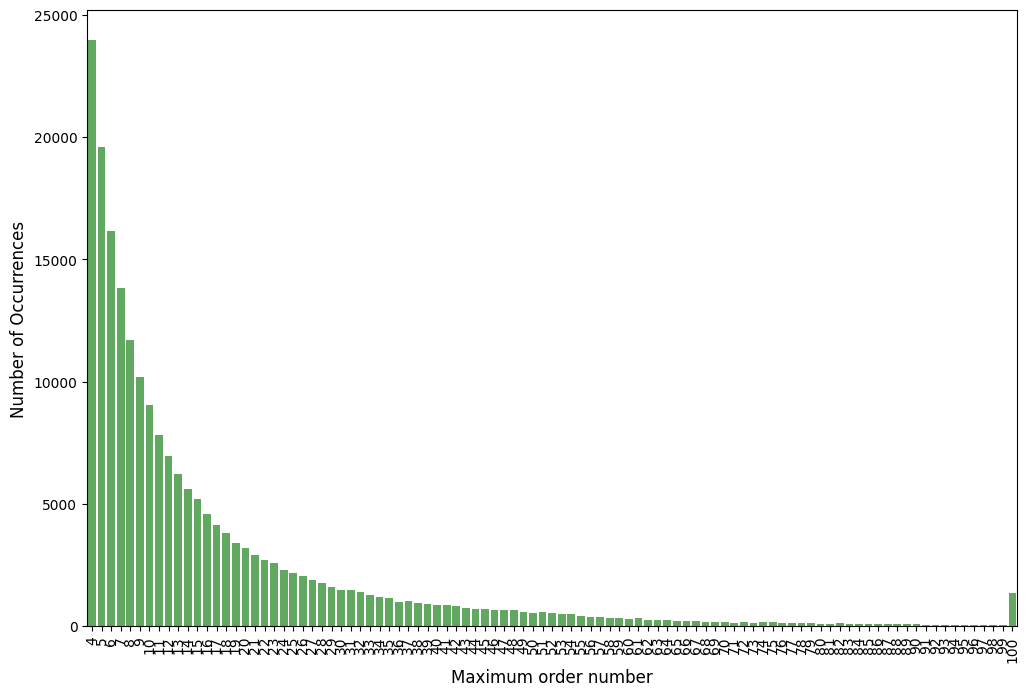

In [11]:
#“고객별로 4~100개의 주문(order)이 주어졌다”는 주장이 맞는지 검증(validate)
cnt_srs=orders_df.groupby('user_id')['order_number'].aggregate(np.max).reset_index()
cnt_srs= cnt_srs.order_number.value_counts()

plt.figure(figsize=(12,8))
sns.barplot(x=cnt_srs.index, y=cnt_srs.values, alpha=0.8, color=color[2])
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Maximum order number', fontsize=12)
plt.xticks(rotation='vertical')
plt.show()

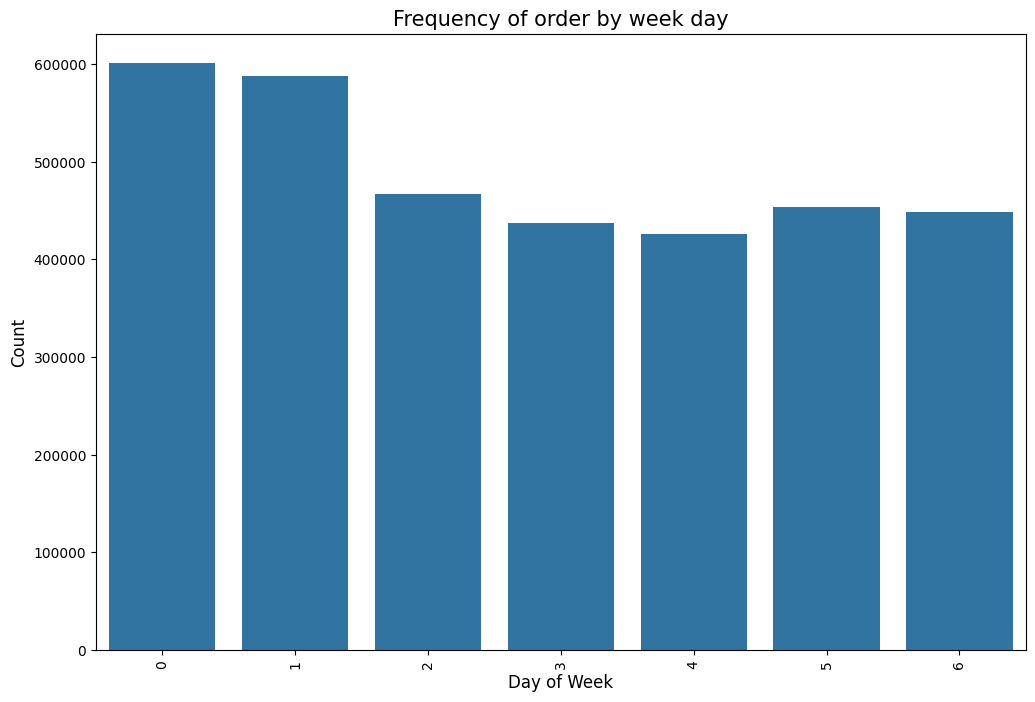

In [12]:
#주문 습관이 일주일의 날마다 어떻게 변하는지 관찰
plt.figure(figsize=(12,8))
sns.countplot(x='order_dow', data=orders_df, color=color[0])
plt.ylabel('Count', fontsize=12)
plt.xlabel('Day of Week', fontsize=12)
plt.xticks(rotation='vertical')
plt.title("Frequency of order by week day", fontsize=15)
plt.show()

#0과 1이 주말, 수요일 가장 적은

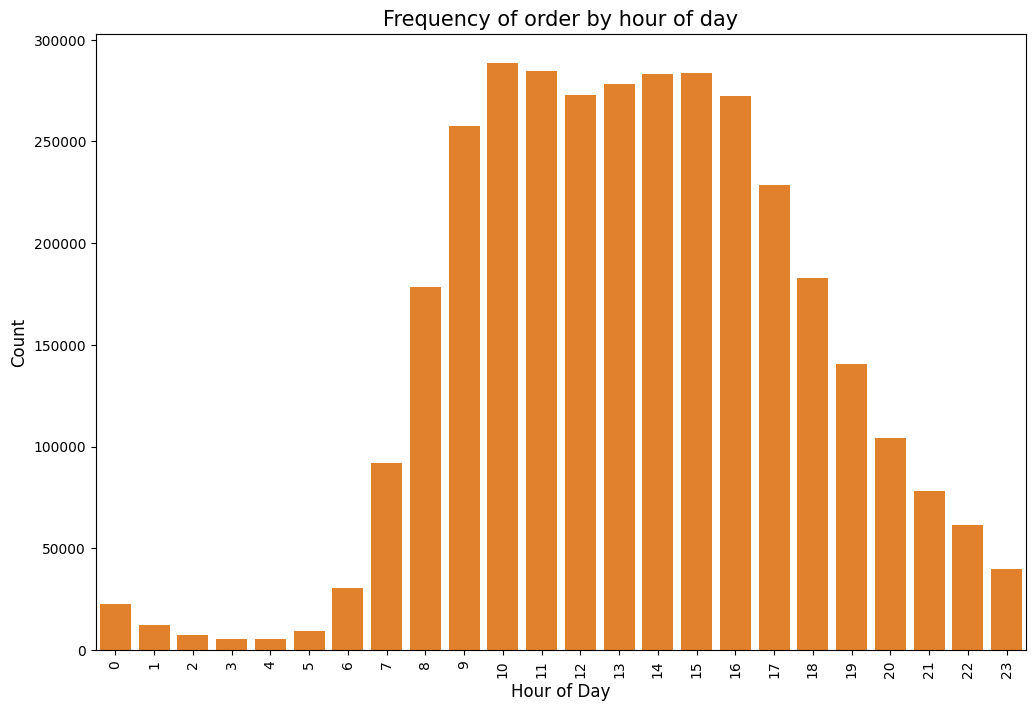

In [13]:
#그 날의 시간에 따라 주문 분포 관찰
plt.figure(figsize=(12,8))
sns.countplot(x='order_hour_of_day', data=orders_df, color=color[1])
plt.ylabel('Count', fontsize=12)
plt.xlabel('Hour of Day', fontsize=12)
plt.xticks(rotation='vertical')
plt.title("Frequency of order by hour of day", fontsize=15)
plt.show()

#낮 시간에 주문 많음

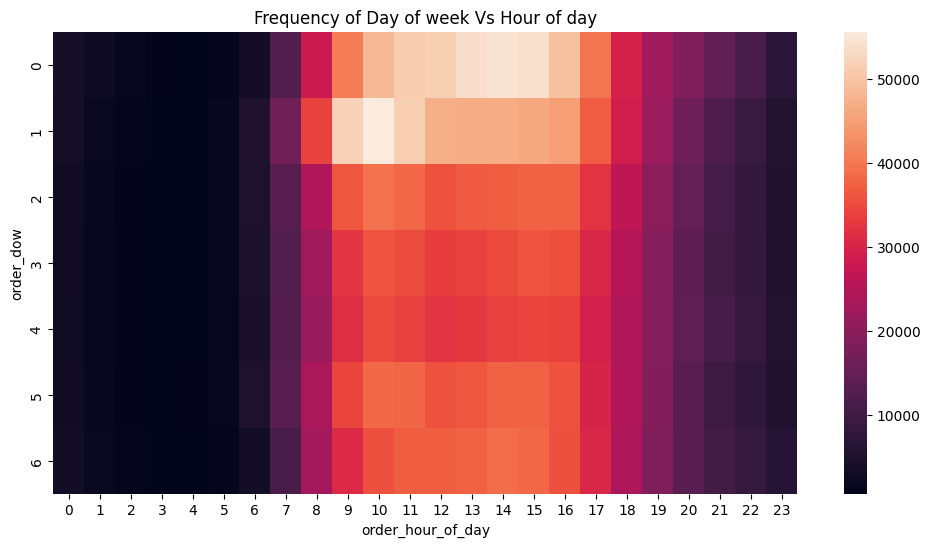

In [14]:
#일주일 중 요일과 하루의 시간 분포 같이 관찰
grouped_df= orders_df.groupby(['order_dow','order_hour_of_day'])["order_number"].aggregate('count').reset_index()
#orders_df를 요일과 시간별로 그룹으로 묶음 + 각 그룹 안에서 order_number가 몇 번 등장했는지 세기
# + .reset_index() 는 인덱스가 그룹 컬럼이 된 상태를 다시 일반 DataFrame 형태로 바꿈

grouped_df= grouped_df.pivot(
    index='order_dow',
    columns='order_hour_of_day',
    values='order_number')
#pivot(index, columns, values) → 데이터를 행과 열로 재배치 / values는 값

plt.figure(figsize=(12,6))
sns.heatmap(grouped_df)
plt.title('Frequency of Day of week Vs Hour of day')
plt.show()

#토요일 저녁과 일요일 오전이 가장 피크

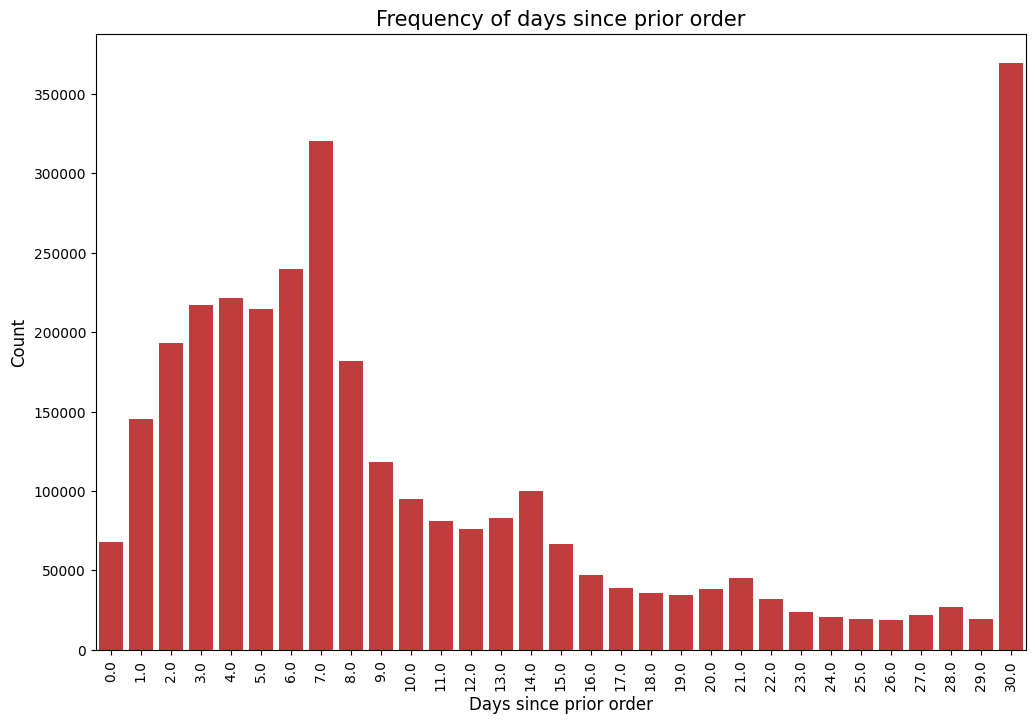

In [15]:
plt.figure(figsize=(12,8))
sns.countplot(x='days_since_prior_order', data=orders_df, color=color[3])
plt.ylabel('Count', fontsize=12)
plt.xlabel('Days since prior order', fontsize=12)
plt.xticks(rotation='vertical')
plt.title("Frequency of days since prior order", fontsize=15)
plt.show()

#고객이 매주 한번 주문하거나 매달 한번 주문하는 듯

In [16]:
#목적은 재구매자 찾기/ 이전, 훈련 데이터셋에서 재구매율 확인

#percentage of re-orders in prior set #
order_products_prior_df.reordered.sum() / order_products_prior_df.shape[0]

np.float64(0.5898472135647959)

In [17]:
# percentage of re-orders in train set #
order_products_train_df.reordered.sum() / order_products_train_df.shape[0]

# 약 59퍼센트의 재구매율

np.float64(0.5985944127509629)

In [18]:
# 재구매 하지 않는 상품들 확인

grouped_df= order_products_prior_df.groupby('order_id')['reordered'].aggregate('sum').reset_index()
#주문마다 재주문된 상품 개수

grouped_df['reordered'].loc[grouped_df['reordered']>1]=1
#재주문 상품이 여러 개 있으면 전부 1로 바꿈

grouped_df.reordered.value_counts()/ grouped_df.shape[0]
#전체 주문 중 몇 %가 재주문 포함인지

/tmp/ipython-input-4072813090.py:6: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  grouped_df['reordered'].loc[grouped_df['reordered']>1]=1


,count
reordered,
1.0,0.879248
0.0,0.120752


In [19]:
grouped_df= order_products_train_df.groupby('order_id')['reordered'].aggregate('sum').reset_index()
grouped_df['reordered'].loc[grouped_df['reordered']>1]=1
grouped_df.reordered.value_counts()/ grouped_df.shape[0]
#train set 에서 확인
#6.5퍼센트 재구매하지 않는 물건 존재

/tmp/ipython-input-1890567430.py:2: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  grouped_df['reordered'].loc[grouped_df['reordered']>1]=1


,count
reordered,
1,0.93444
0,0.06556


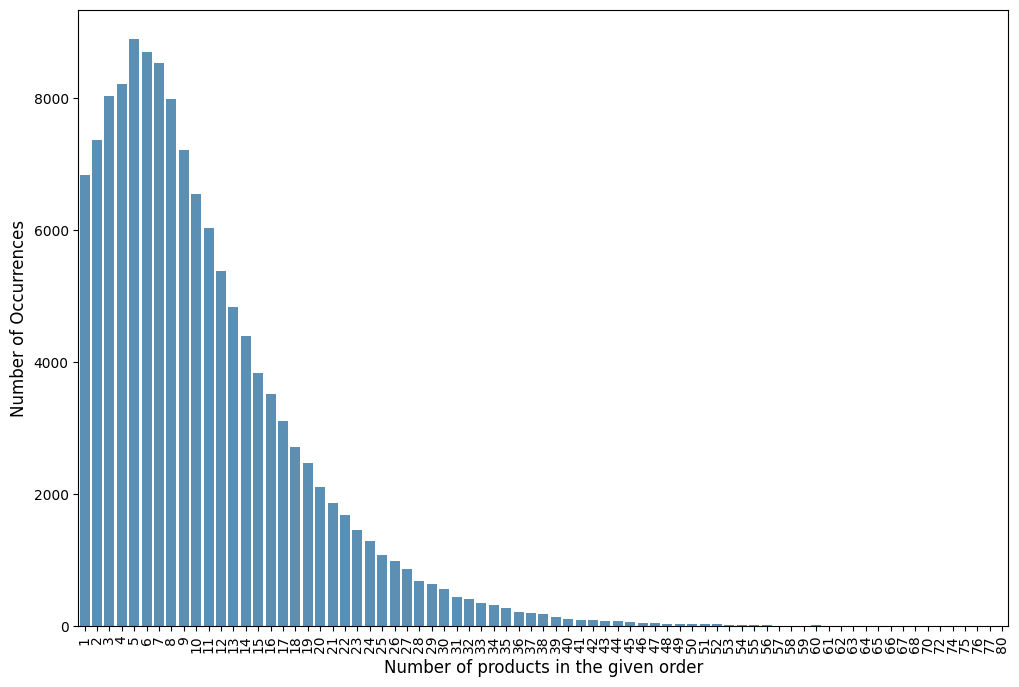

In [20]:
grouped_df= order_products_train_df.groupby('order_id')['add_to_cart_order'].aggregate('max').reset_index()
cnt_srs= grouped_df.add_to_cart_order.value_counts()

plt.figure(figsize=(12,8))
sns.barplot(x=cnt_srs.index, y=cnt_srs.values, alpha=0.8)
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Number of products in the given order', fontsize=12)
plt.xticks(rotation='vertical')
plt.show()

#5에서 최대치를 찍는 오른쪽 꼬리 분포

In [21]:
products_df.head()

,product_id,product_name,aisle_id,department_id
0,1,Chocolate Sandwich Cookies,61,19
1,2,All-Seasons Salt,104,13
2,3,Robust Golden Unsweetened Oolong Tea,94,7
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1
4,5,Green Chile Anytime Sauce,5,13


In [22]:
aisles_df.head()

,aisle_id,aisle
0,1,prepared soups salads
1,2,specialty cheeses
2,3,energy granola bars
3,4,instant foods
4,5,marinades meat preparation


In [23]:
departments_df.head()

,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol


In [24]:
order_products_prior_df= order_products_prior_df.drop(
    columns=['product_name', 'aisle_id','department_id'],
    errors='ignore'

)

order_products_prior_df= pd.merge(order_products_prior_df, products_df[['product_id','product_name','aisle_id','department_id']], on='product_id', how='left')
#주문과 상품이 매칭된 데이터 + 상품 정보-> 공통인 product_id 를 기준으로 합침, 왼쪽 행 유지

order_products_prior_df=pd.merge(order_products_prior_df, aisles_df[['aisle_id','aisle']], on='aisle_id', how='left')
order_products_prior_df= pd.merge(order_products_prior_df, departments_df[['department_id','department']], on='department_id', how='left')
order_products_prior_df.head()
# 이제 주문 상품 매칭 데이터에 상품명, aisle 이름, department 이름까지 더해짐

,order_id,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,aisle,department
0,2,33120,1.0,1.0,Organic Egg Whites,86,16,eggs,dairy eggs
1,2,28985,2.0,1.0,Michigan Organic Kale,83,4,fresh vegetables,produce
2,2,9327,3.0,0.0,Garlic Powder,104,13,spices seasonings,pantry
3,2,45918,4.0,1.0,Coconut Butter,19,13,oils vinegars,pantry
4,2,30035,5.0,0.0,Natural Sweetener,17,13,baking ingredients,pantry


In [25]:
cnt_srs= order_products_prior_df['product_name'].value_counts().reset_index().head(20)
cnt_srs.columns= ['product_name','frequency_count']
cnt_srs

#최빈값을 갖는 상품들은 대부분 organic products 이고 대다수가 과일

,product_name,frequency_count
0,Banana,373036
1,Bag of Organic Bananas,299056
2,Organic Strawberries,208785
3,Organic Baby Spinach,190460
4,Organic Hass Avocado,168268
5,Organic Avocado,139516
6,Large Lemon,120357
7,Strawberries,112527
8,Limes,110703
9,Organic Whole Milk,108724


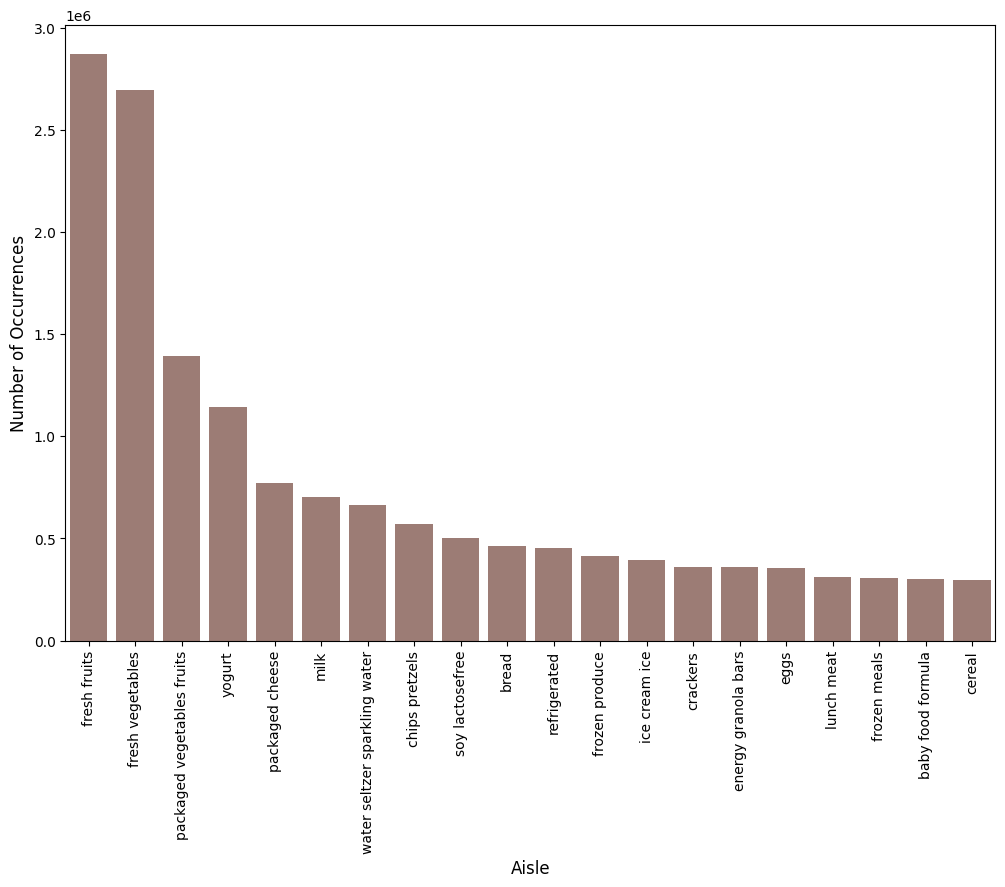

In [26]:
cnt_srs=order_products_prior_df['aisle'].value_counts().head(20)

plt.figure(figsize=(12,8))
sns.barplot(x=cnt_srs.index, y=cnt_srs.values, alpha=0.8, color=color[5])
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Aisle', fontsize=12)
plt.xticks(rotation='vertical')
plt.show()

#aisle은 과일, 야채가 투톱

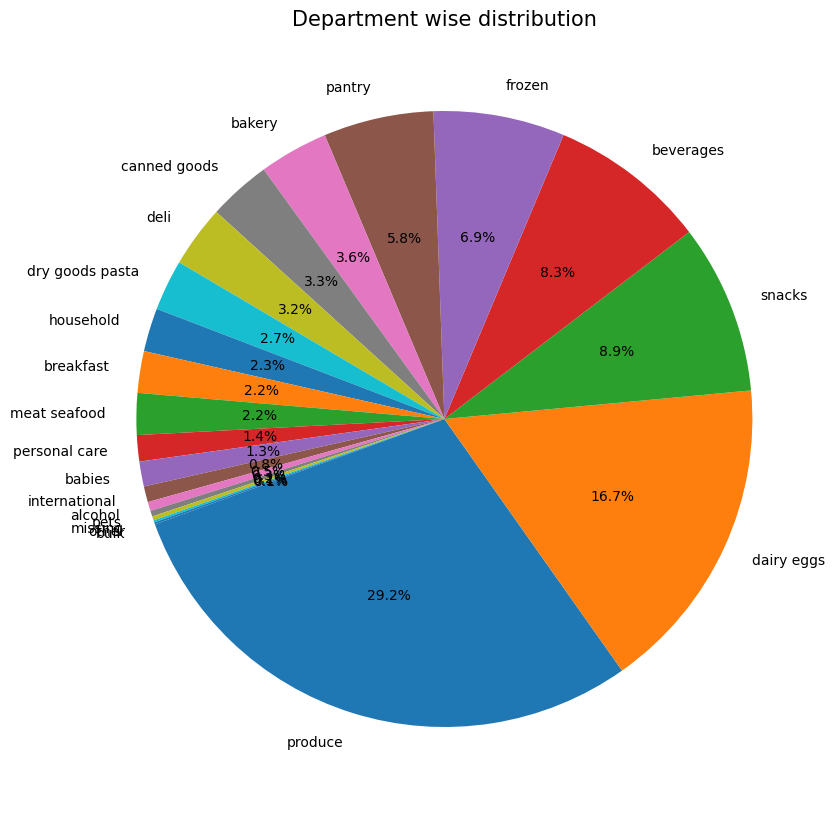

In [27]:
#department wise 분포 확인
plt.figure(figsize=(10,10))
temp_series=order_products_prior_df['department'].value_counts()

labels=(np.array(temp_series.index))
#파이 차트에서 보여줄 라벨 목록 만듬
sizes=(np.array((temp_series/ temp_series.sum())*100)) #비율
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=200) #조각 안에 백분율 표시, 파이 차트 시작 각도 200도
plt.title('Department wise distribution', fontsize=15)
plt.show()

#produce가 가장 큰 department

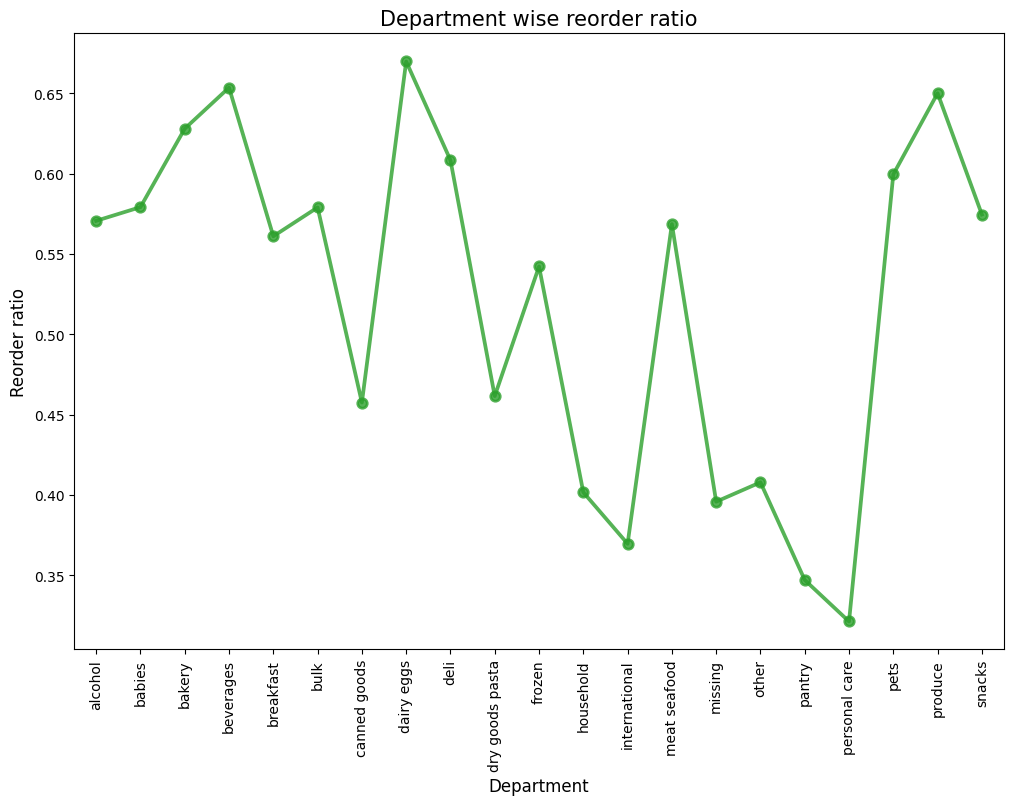

In [30]:
#각 department의 재주문 비율 확인
grouped_df= order_products_prior_df.groupby('department')['reordered'].aggregate('mean').reset_index()

plt.figure(figsize=(12,8))
sns.pointplot(
    x=grouped_df['department'].values,
    y=grouped_df['reordered'].values, alpha=0.8, color=color[2])
plt.ylabel('Reorder ratio', fontsize=12)
plt.xlabel('Department', fontsize=12)
plt.title('Department wise reorder ratio', fontsize=15)
plt.xticks(rotation='vertical')
plt.show()

#personal care 최하, dairy eggs 최상의 재구매율

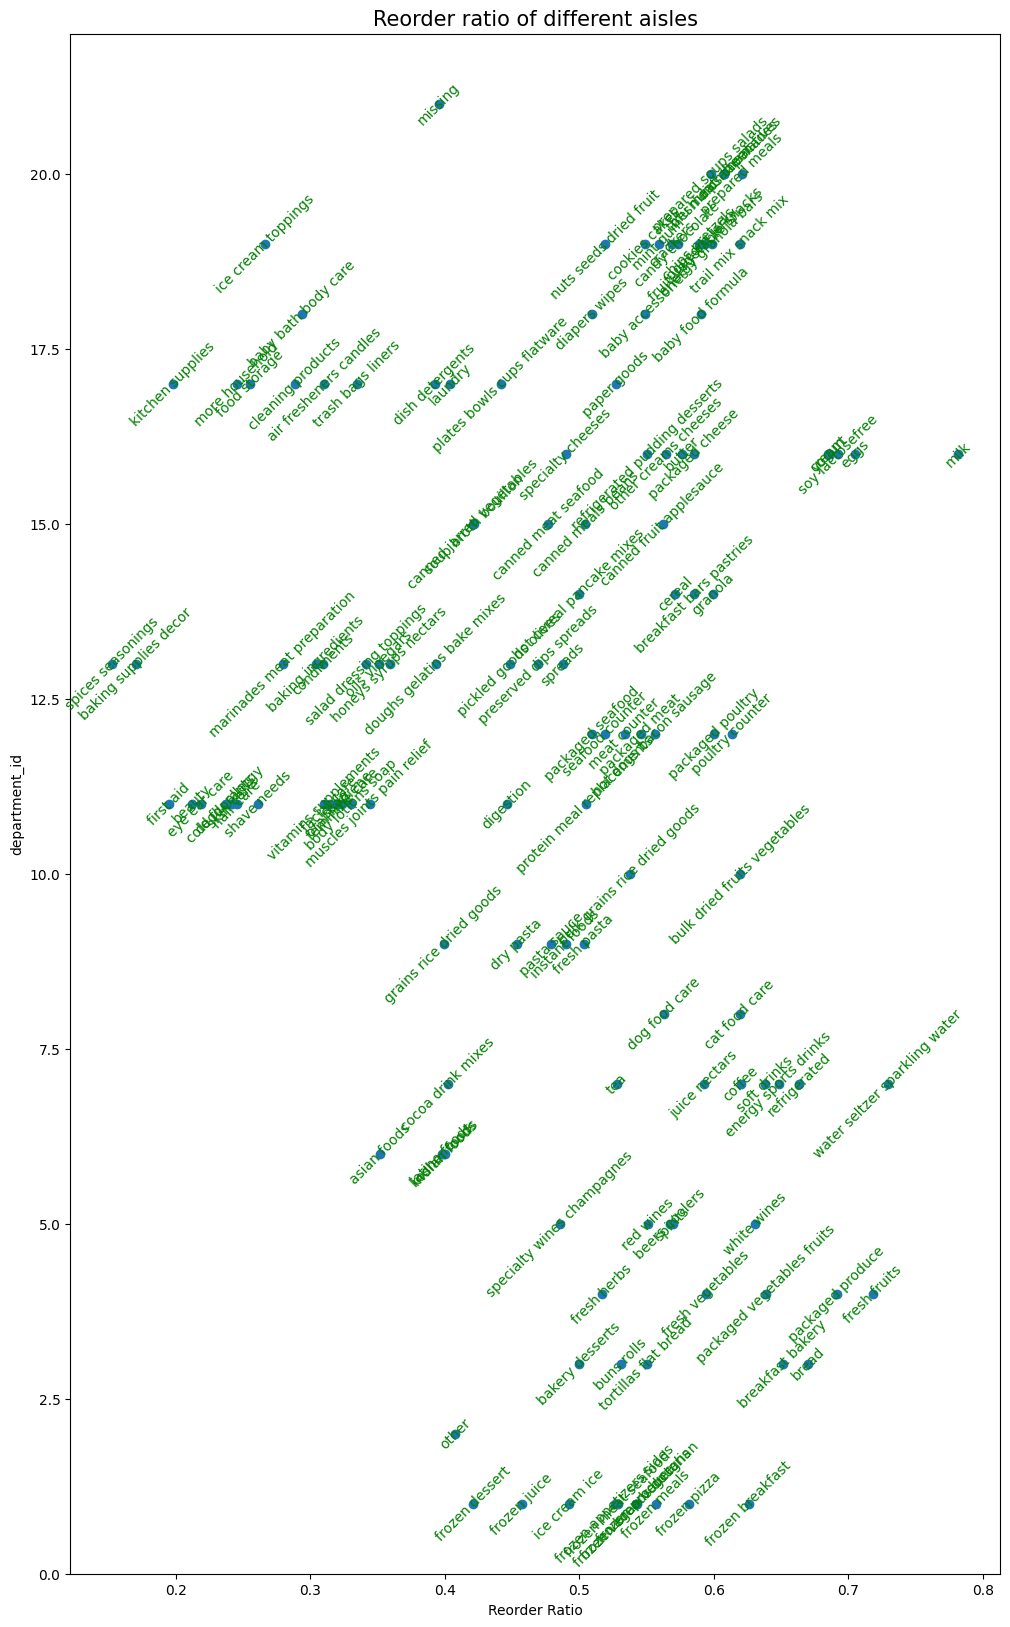

In [31]:
grouped_df= order_products_prior_df.groupby(['department_id','aisle'])['reordered'].aggregate('mean').reset_index()

fig, ax= plt.subplots(figsize=(12,20))
ax.scatter(grouped_df.reordered.values, grouped_df.department_id.values)
#산점도 그리기-> 재주문 비율과 부서 ID

for i, txt in enumerate(grouped_df.aisle.values):
    ax.annotate(
        txt,
        (grouped_df.reordered.values[i], grouped_df.department_id.values[i]),
        rotation=45,
        ha='center',
        va='center',
        color='green')
#표시할 텍스트(aisle 이름), 글자는 수평 수직 중앙 정렬
#enumerate() -> 각 aisle 이름과 인덱스 가져옴
#ax.annotate() -> 산점도 위에 텍스트 붙이기 -> 텍스트 붙일 좌표 x y

plt.xlabel('Reorder Ratio')
plt.ylabel('department_id')

plt.title('Reorder ratio of different aisles', fontsize=15)
plt.show()


/tmp/ipython-input-3867108354.py:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  order_products_prior_df['add_to_cart_order_mod'].loc[order_products_prior_df['add_to_cart_order_mod']>70]=70


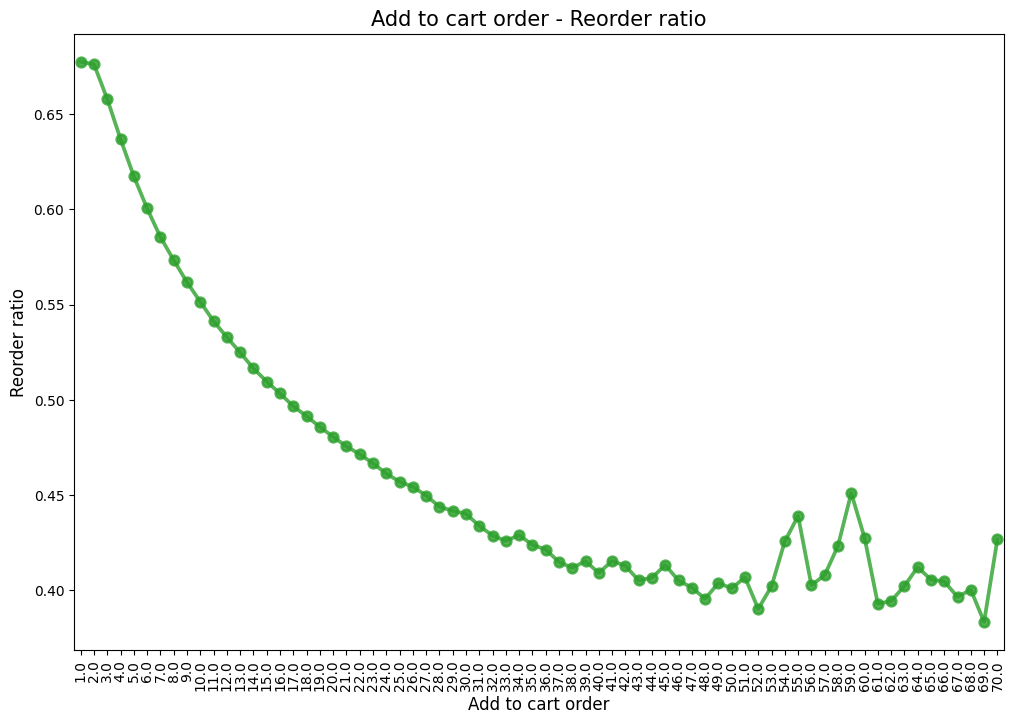

In [34]:
#Add to Cart - Reorder ratio
#장바구니에 상품을 넣는 순서가 재구매율에 미치는 영향 확인

order_products_prior_df['add_to_cart_order_mod']= order_products_prior_df['add_to_cart_order'].copy()
order_products_prior_df['add_to_cart_order_mod'].loc[order_products_prior_df['add_to_cart_order_mod']>70]=70
#Series 는 ix 없고 loc 사용함 이제
#loc-> 라벨 기반 선택 / iloc-> 위치 기반 선택
grouped_df=order_products_prior_df.groupby(['add_to_cart_order_mod'])['reordered'].aggregate('mean').reset_index()

plt.figure(figsize=(12,8))
sns.pointplot(
    x=grouped_df['add_to_cart_order_mod'].values,
    y=grouped_df['reordered'].values, alpha=0.8, color=color[2])
plt.ylabel('Reorder ratio', fontsize=12)
plt.xlabel('Add to cart order', fontsize=12)
plt.title('Add to cart order - Reorder ratio', fontsize=15)
plt.xticks(rotation='vertical')
plt.show()

#처음에 장바구니에 넣은 상품들이 재구매될 확률 높음

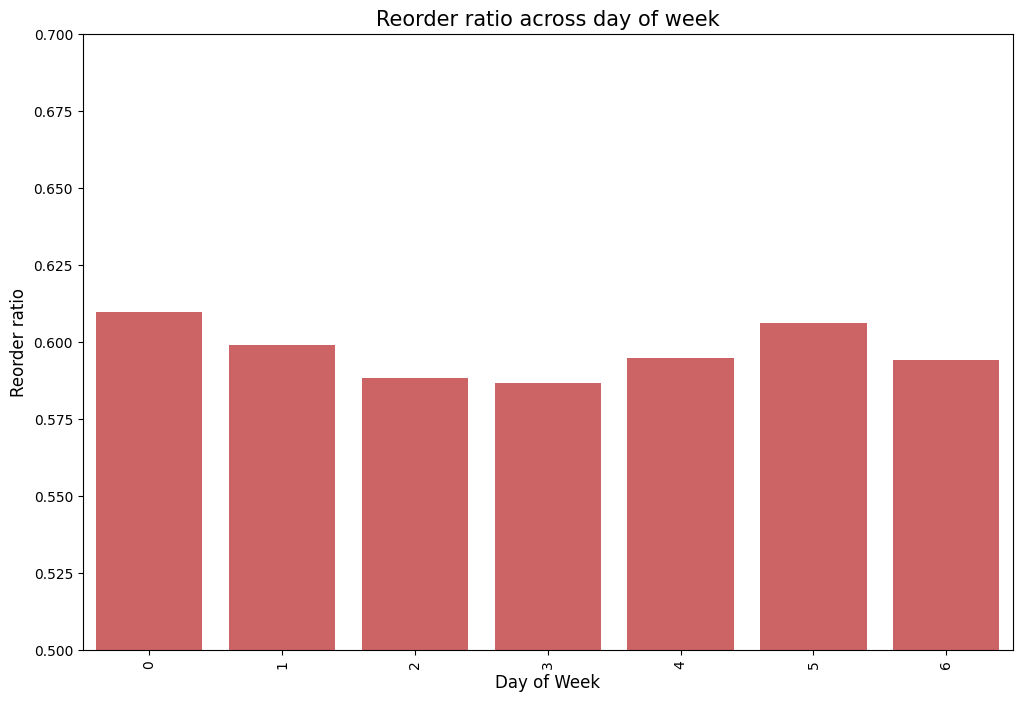

In [37]:
#변수를 바탕으로 시간에 따른 재구매율 확인

order_products_train_df= pd.merge(order_products_train_df, orders_df[['order_id','order_dow']], on='order_id', how='left')
grouped_df= order_products_train_df.groupby('order_dow')['reordered'].aggregate('mean').reset_index()

plt.figure(figsize=(12,8))
sns.barplot(
    x=grouped_df['order_dow'].values,
    y=grouped_df['reordered'].values, alpha=0.8, color=color[3])
plt.ylabel('Reorder ratio', fontsize=12)
plt.xlabel('Day of Week', fontsize=12)
plt.title('Reorder ratio across day of week', fontsize=15)
plt.xticks(rotation='vertical')
plt.ylim(0.5,0.7)
plt.show()

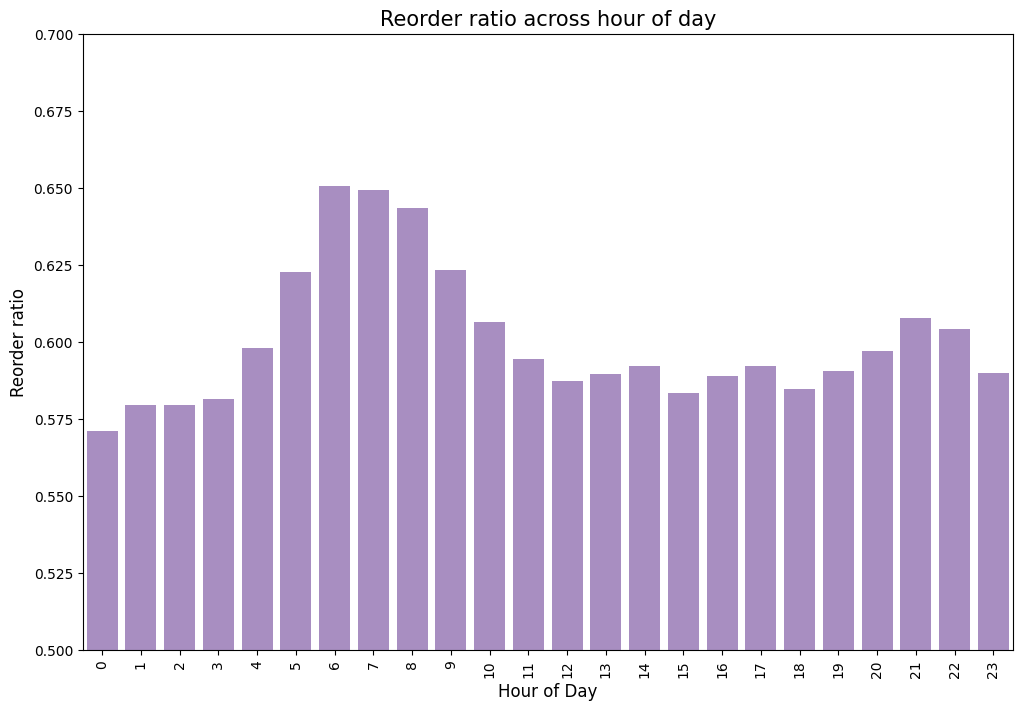

In [42]:
#시간대별 평균 재주문만 보기

#grouped_df=order_products_train_df.groupby(['order_dow','order_hour_of_day'])['reordered'].aggregate('mean').reset_index()
order_products_train_df = pd.merge(
    order_products_train_df,
    orders_df[['order_id','order_hour_of_day']],
    on='order_id',
    how='left'
)

hourly_df=order_products_train_df.groupby('order_hour_of_day')['reordered'].mean().reset_index()

plt.figure(figsize=(12,8))
sns.barplot(
    x='order_hour_of_day',
    y='reordered',
    data=hourly_df, alpha=0.8, color=color[4])
plt.ylabel('Reorder ratio', fontsize=12)
plt.xlabel('Hour of Day', fontsize=12)
plt.title('Reorder ratio across hour of day', fontsize=15)
plt.xticks(rotation='vertical')
plt.ylim(0.5,0.7)
plt.show()

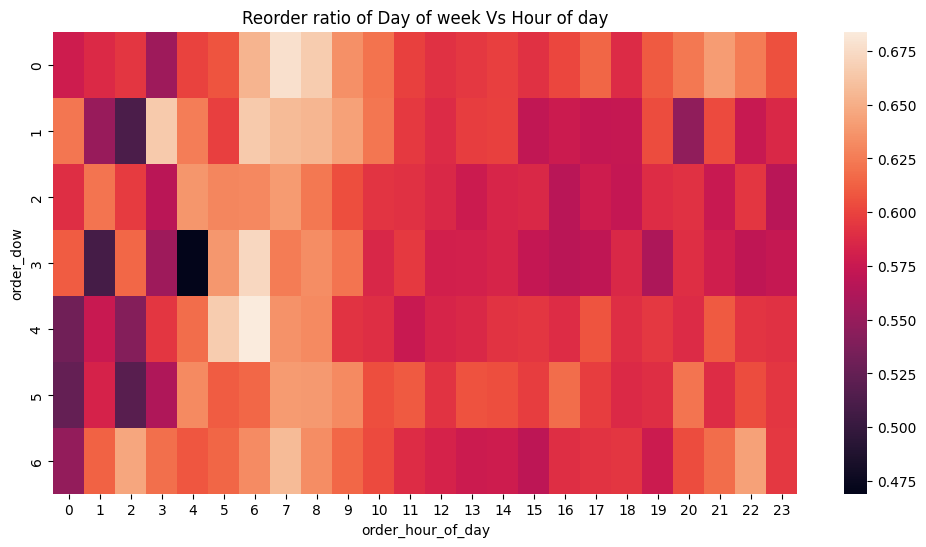

In [44]:
grouped_df=order_products_train_df.groupby(['order_dow','order_hour_of_day'])['reordered'].aggregate('mean').reset_index()
grouped_df= grouped_df.pivot(
    index='order_dow',
    columns='order_hour_of_day',
    values='reordered')

plt.figure(figsize=(12,6))
sns.heatmap(grouped_df)
plt.title('Reorder ratio of Day of week Vs Hour of day')
plt.show()

#하루의 절반이 넘어간 시점보다 이른 아침에 재구매율이 높게 나옴.

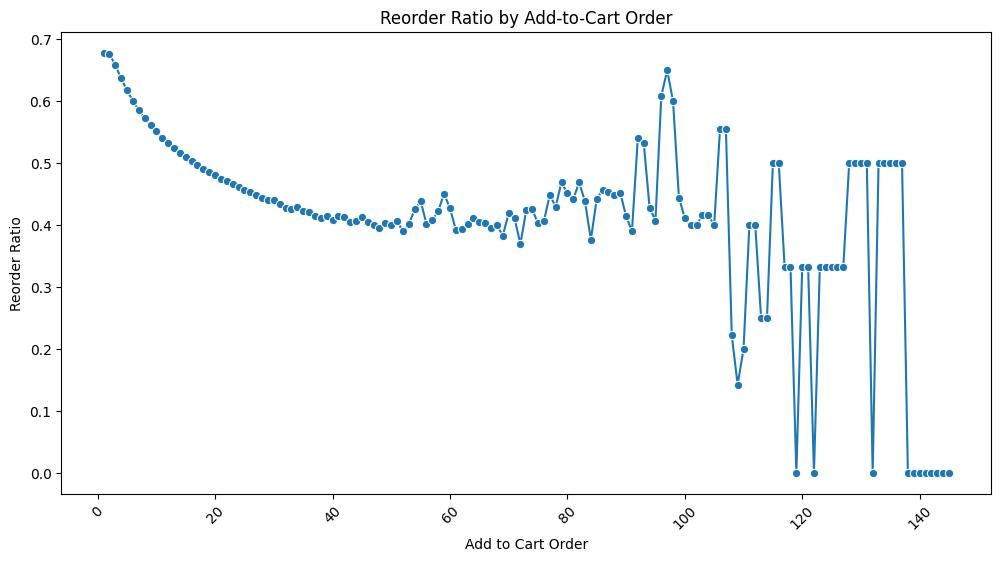

In [45]:
##추가 시각화
#장바구니 순서별 재주문률 계산

cart_reorder = order_products_prior_df.groupby('add_to_cart_order')['reordered'].mean().reset_index()

plt.figure(figsize=(12,6))
sns.lineplot(x='add_to_cart_order', y='reordered', data=cart_reorder, marker='o')
plt.xlabel('Add to Cart Order')
plt.ylabel('Reorder Ratio')
plt.title('Reorder Ratio by Add-to-Cart Order')
plt.xticks(rotation=45)
plt.show()



>앞 순서에 있을수록 담은 상품들의 재구매율이 높은 것을 확인할 수 있다. 약 100번째 순서에 재구매율이 높아지고 이후에 변동폭이 크게 나타나는데, 이것은 상품을 담는 순서가 많이 커질수록 표본이 적어 재구매율을 평균적으로 나타내지 못하고 특이 케이스로 나타나는 것이 아닌지 생각해볼수있다.